### Clustering Algorithm
##### Customer Segmentation based on marketing_campaign.csv

### Data Analysis

In [125]:
import pandas as pd

file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, sep='\t')
num_records, num_features = data.shape
print("First 10 rows:")
print(data.head(10))
null_values = data.isnull().sum()
print("\nNumber of nulls:")
print(null_values)
print("\nTypes of data:")
print(data.dtypes)


First 10 rows:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...               

#### Data Processing

In [126]:
# Cleaning Data
# Drop null values
data.dropna(inplace=True)
# New attribute [Age] = 2023 - Year_Birth 
data['Age'] = 2023 - data['Year_Birth']
# New attribute [TotalAmountSpent]
data['TotalAmountSpent'] = data['MntFishProducts'] + data['MntFruits'] + data['MntGoldProds'] + data['MntSweetProducts'] + data['MntMeatProducts'] + data['MntWines']
# Drop symbolic values
data_processed = data.drop(['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Year_Birth'], axis=1)
# Show
num_records_processed, num_features_processed = data_processed.shape
print(f"Number of records: {num_records_processed}, number of features: {num_features_processed}")
null_values = data_processed.isnull().sum().sum()
print(f"Number of null values: {null_values}")
print("Czy zawiera wartości nulowe:\n",data_processed.isnull().sum())


Number of records: 2216, number of features: 26
Number of null values: 0
Czy zawiera wartości nulowe:
 Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
TotalAmountSpent       0
dtype: int64


In [127]:
from sklearn.preprocessing import StandardScaler

# Data standardization
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_processed)

### K-means


In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(data_normalized)
silhouette_score = silhouette_score(data_normalized, clusters)
print(f"Kmeans with 5 clusters: {silhouette_score}")

Kmeans with 5 clusters: 0.12108469126342787


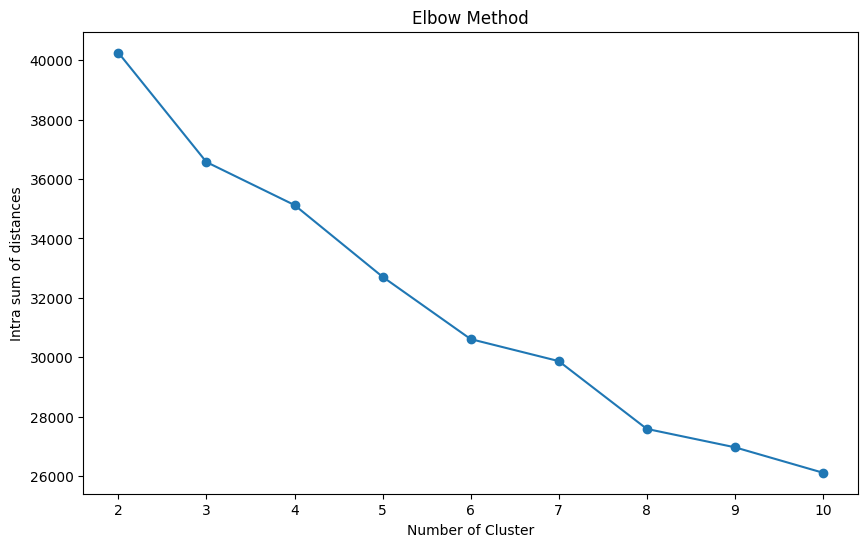

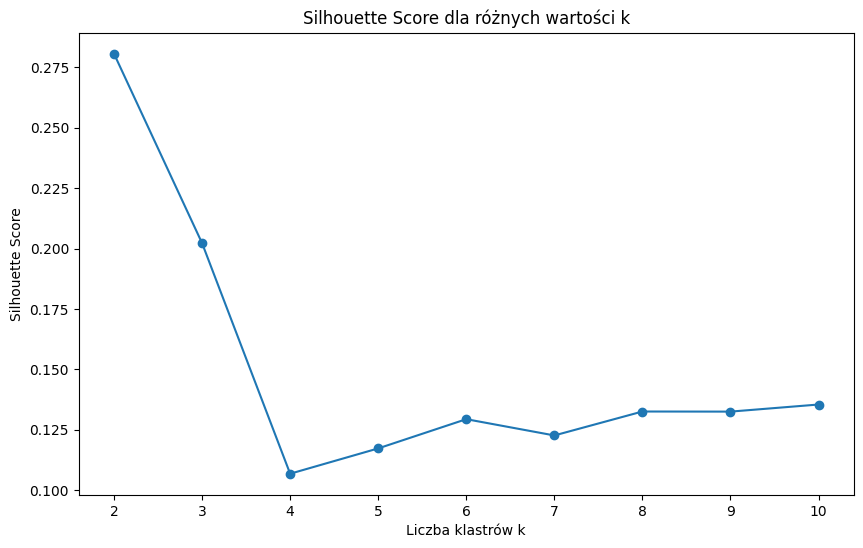

In [129]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Lista do przechowywania sum kwadratów odległości wewnątrz klastrów (inertia)
intra_sum_of_square_list = []


# Zakres k, który chcemy przetestować
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(data_normalized)
    
    intra_sum_of_square_list.append(kmeans.inertia_)
    silhouette = silhouette_score(data_normalized, clusters)
    silhouette_scores.append(silhouette)

# Wykres Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, intra_sum_of_square_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Intra sum of distances')
plt.show()

# Wykres Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score dla różnych wartości k')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Silhouette Score')
plt.show()

Kmeans with 3 clusters: 0.2022488207620317


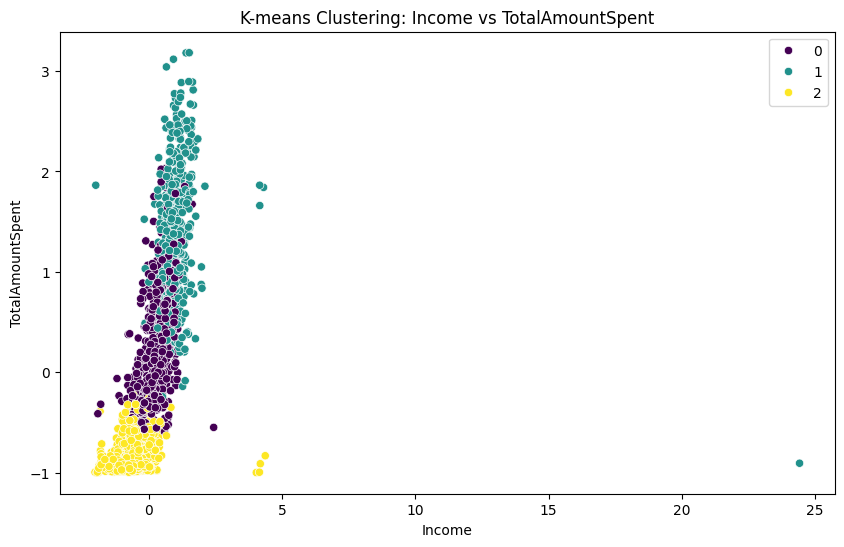

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_normalized)
silhouette = silhouette_score(data_normalized, clusters)
print(f"Kmeans with 3 clusters: {silhouette}")
data_df = pd.DataFrame(data_normalized, columns=[ 'Income',	'Kidhome',	'Teenhome',	'Recency',	'MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact',	'Z_Revenue',	'Response', 'Age', 'TotalAmountSpent', 
])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalAmountSpent', hue=clusters, data=data_df, palette='viridis')
plt.title('K-means Clustering: Income vs TotalAmountSpent')
plt.xlabel('Income')
plt.ylabel('TotalAmountSpent')
plt.show()

### Agglomerative Clustering

In [131]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from numpy import unique
agg_clustering = AgglomerativeClustering(n_clusters=5)
clusters_agg = agg_clustering.fit_predict(data_normalized)

silhouette_avg_agg = silhouette_score(data_normalized, clusters_agg)
print(f"Silhouette Score for k=5: {silhouette_avg_agg}")

agg_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_result = agg_clustering.fit_predict(data_normalized)
agglomerative_clusters = unique(agglomerative_result)
score_aggl = silhouette_score(data_normalized, agglomerative_result, metric='euclidean')
print(f"Silhouette Score for k=5: {score_aggl}")

Silhouette Score for k=5: 0.17965153528483016
Silhouette Score for k=5: 0.2859354767227514


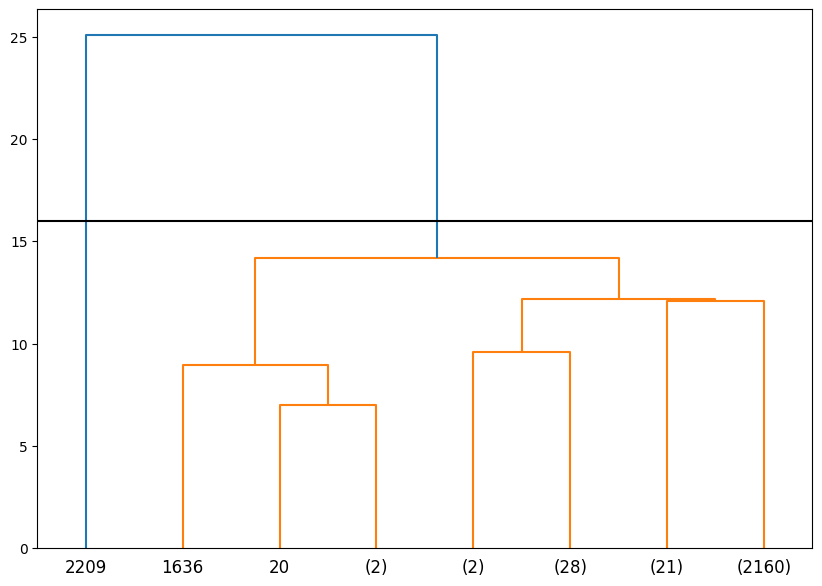

In [132]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(data_normalized, 'average')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, p=3, truncate_mode="level")
plt.axhline(y=16, c='k') 
plt.show()

Silhouette Score for k=2: 0.26869273379736713


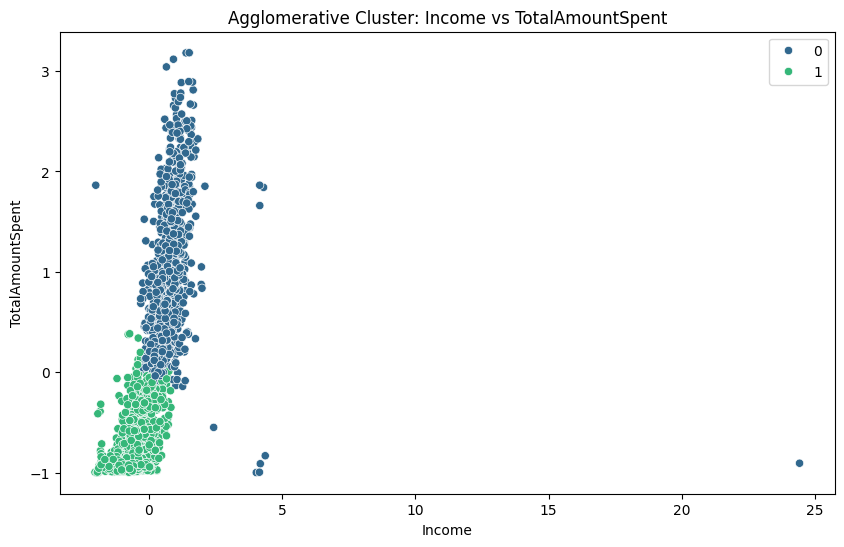

In [133]:

agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters_agg = agg_clustering.fit_predict(data_df[['Income', 'TotalAmountSpent']])
silhouette_avg_agg = silhouette_score(data_normalized, clusters_agg)
print(f"Silhouette Score for k=2: {silhouette_avg_agg}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalAmountSpent', hue=clusters_agg, data=data_df, palette='viridis')
plt.title('Agglomerative Cluster: Income vs TotalAmountSpent')
plt.xlabel('Income')
plt.ylabel('TotalAmountSpent')
plt.show()

### DBSCAN

Silhouette score of DBSCAN:  0.27682941447162174


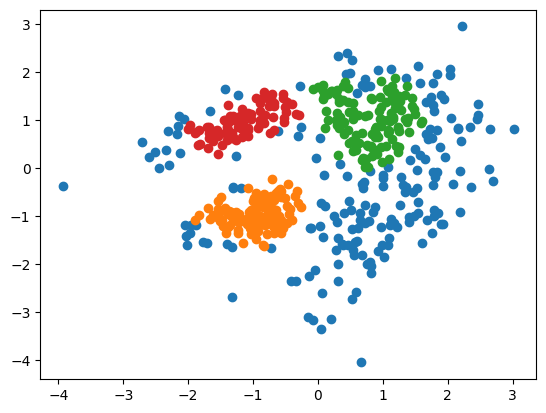

     eps  min_samples  silhouette_score
0   0.25            5          0.304338
1   0.25           10          0.276829
2   0.25           15          0.015268
3   0.50            5          0.402075
4   0.50           10          0.335634
5   0.50           15          0.300646
6   0.60            5          0.440502
7   0.60           10          0.429221
8   0.60           15          0.353366
9   0.75            5          0.440502
10  0.75           10          0.440502
11  0.75           15          0.402075
Best params: epsilon= 0.6, min_samples= 5.0 with score: 0.44050169148593693


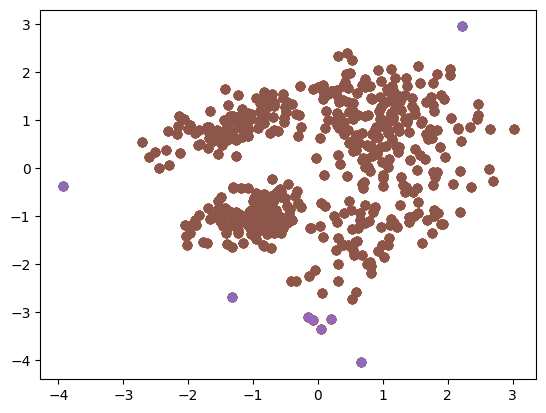

In [134]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
training_data, _ = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    random_state=4
)
dbscan_model = DBSCAN(eps=0.25, min_samples=10)
dbscan_model.fit(training_data) 
dbscan_result = dbscan_model.fit_predict(training_data)
dbscan_clusters = unique(dbscan_result)
# dbscan visualisation
for cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])
score_dbscan = silhouette_score(training_data, dbscan_result, metric='euclidean')
print ("Silhouette score of DBSCAN: ", score_dbscan)
# show the dbscan plot
pyplot.show()

eps_values = [ 0.25, 0.5, 0.6, 0.75]
min_samples_values = [5,10,15]

silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_model.fit(training_data) 
        dbscan_result = dbscan_model.fit_predict(training_data)
        dbscan_clusters = unique(dbscan_result)
        for cluster in dbscan_clusters:
            # get data points that fall in this cluster
            index = where(dbscan_result == cluster)
            # make the plot
            pyplot.scatter(training_data[index, 0], training_data[index, 1])
        score_dbscan = silhouette_score(training_data, dbscan_result, metric='euclidean')
        silhouette_scores.append((eps, min_samples, score_dbscan))

silhouette_results_df = pd.DataFrame(silhouette_scores, columns=['eps', 'min_samples', 'silhouette_score'])
print(silhouette_results_df)
best_result = silhouette_results_df.sort_values('silhouette_score', ascending=False).iloc[0]
best_eps = best_result['eps']
best_min_samples = best_result['min_samples']
best_score = best_result['silhouette_score']
print(f"Best params: epsilon= {best_eps}, min_samples= {best_min_samples} with score: {best_score}")




DBSCAN Silhouette Score: 0.7466207604443437


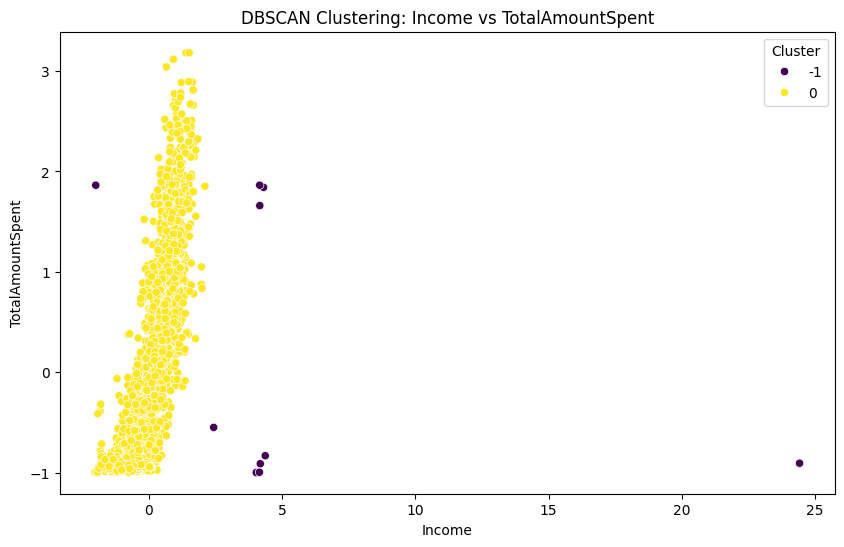

In [135]:
# best params
best_eps = 0.6
best_min_samples = 5
dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_result = dbscan_model.fit_predict(data_df[['Income', 'TotalAmountSpent']])

# Obliczenie DBSCAN Silhouette Score
score_dbscan = silhouette_score(data_df[['Income', 'TotalAmountSpent']], dbscan_result)
print(f"DBSCAN Silhouette Score: {score_dbscan}")

# Wizualizacja klastrów
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalAmountSpent', hue=dbscan_result, data=data_df, palette='viridis')
plt.title('DBSCAN Clustering: Income vs TotalAmountSpent')
plt.xlabel('Income')
plt.ylabel('TotalAmountSpent')
plt.legend(title='Cluster')
plt.show()